In [1]:
import numpy as np
import xarray as xr
import glob
import gsw
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm.notebook import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# comparison across filter scales and time ranges 
fp50 = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_6mo_50km_2011_2018.nc'
fp75 = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_6mo_75km_2011_2018.nc'
fp100 = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_6mo_100km_2011_2018.nc'
df50 = xr.open_dataset(fp50)
df75 = xr.open_dataset(fp75)
df100 = xr.open_dataset(fp100)
fp50_1yr = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_1yr_50km_2011_2018.nc'
fp75_1yr = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_1yr_75km_2011_2018.nc'
fp100_1yr = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_1yr_100km_2011_2018.nc'
df50_1yr = xr.open_dataset(fp50_1yr)
df75_1yr = xr.open_dataset(fp75_1yr)
df100_1yr = xr.open_dataset(fp100_1yr)
fp50_allt = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_allt_50km_2011_2018.nc'
fp75_allt = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_allt_75km_2011_2018.nc'
fp100_allt = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_allt_100km_2011_2018.nc'
df50_allt = xr.open_dataset(fp50_allt)
df75_allt = xr.open_dataset(fp75_allt)
df100_allt = xr.open_dataset(fp100_allt)
# string together 
df = [df50, df75, df100]
df_1yr = [df50_1yr, df75_1yr, df100_1yr]
df_allt = [df50_allt, df75_allt, df100_allt]

In [5]:
fp75_w_allt = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_winter_allt_75km_2011_2018.nc'
fp75_s_allt = '/Users/jakesteinberg/Documents/CPT/Argo/processed/gridded_eape_nw_pacific_summer_allt_75km_2011_2018.nc'
df75_w_allt = xr.open_dataset(fp75_w_allt)
df75_s_allt = xr.open_dataset(fp75_s_allt)
df = [df75_w_allt, df75_s_allt]

In [11]:
# lon_grid = df75_w_allt.longitude.data
# lat_grid = df75_w_allt.latitude.data
lon_grid = df50_1yr.longitude.data
lat_grid = df50_1yr.latitude.data
Lon_grid, Lat_grid = np.meshgrid(lon_grid, lat_grid)
p_grid = df50_1yr.pressure.data

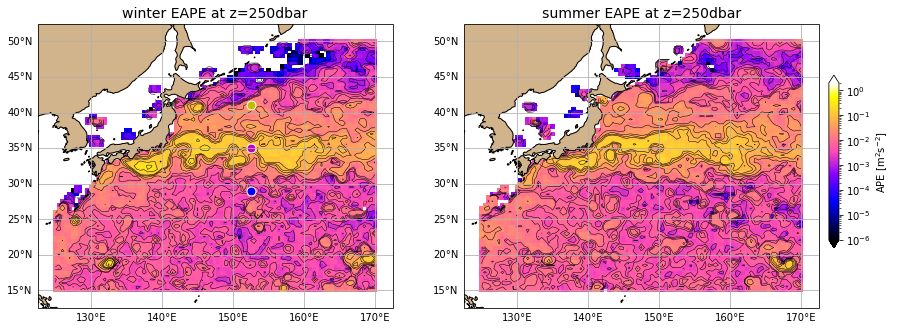

In [5]:
this_z = 25
# hres = ['50km', '75km', '100km']
hres = ['winter', 'summer']
tcmap = plt.get_cmap('gnuplot2')
ape_levs = [0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 10]
data_coords = {'latitude': lat_grid, 'longitude': lon_grid}

f, ax = plt.subplots(1,2,figsize=(14,8), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
gax = ax.flatten()
for i in range(len(gax)):
    ape_xr = xr.DataArray(data=np.transpose(df[i].eape1.data[:, :, this_z]), \
                                      name='ape', dims=['latitude', 'longitude'], coords=data_coords)
    gax[i].add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1)
    gax[i].coastlines()
    ape_ax = ape_xr.plot(ax=gax[i],transform=ccrs.PlateCarree(), norm=LogNorm(vmin=0.000001, vmax=2),\
                         cmap=tcmap, zorder=0, add_colorbar=False)
    ape_xr.plot.contour(ax=gax[i],transform=ccrs.PlateCarree(), levels=ape_levs, zorder=1, add_colorbar=False, colors='k', linewidths=0.5)
    gax[i].set_extent([lon_grid[0] - 2.5, lon_grid[-1] + 2.5, lat_grid[0] - 2.5, lat_grid[-1] + 2.5], crs=ccrs.PlateCarree())
    gl = gax[i].gridlines(draw_labels=True)
    gax[i].set_title(hres[i] + ' EAPE at z=' + str(np.round(p_grid[this_z],2)) + 'dbar', fontsize=14)
    gl.xlabels_top = False
    gl.ylabels_right = False

this_lon=55
this_lat=40
for i in range(len(gax)-1):
    gax[i].scatter(Lon_grid[this_lat,this_lon],Lat_grid[this_lat,this_lon],color='m',marker="o",s=80,edgecolor='w')
    gax[i].scatter(Lon_grid[this_lat+12,this_lon],Lat_grid[this_lat+12,this_lon],color='y',marker="o",s=80,edgecolor='w')
    gax[i].scatter(Lon_grid[this_lat-12,this_lon],Lat_grid[this_lat-12,this_lon],color='b',marker="o",s=80,edgecolor='w')
cbpos = [0.91, 0.36, 0.01, 0.3]
cax = f.add_axes(cbpos)
cb = f.colorbar(ape_ax, cax=cax, orientation='vertical', extend='both', label='APE [m$^2$s$^{-2}$]')
# f.savefig('/Users/jakesteinberg/Documents/CPT/meetings/2021_05_28/argo_eape_3filterscales_' + \
#           str(p_grid[this_z]) + 'db.jpg', dpi=550)

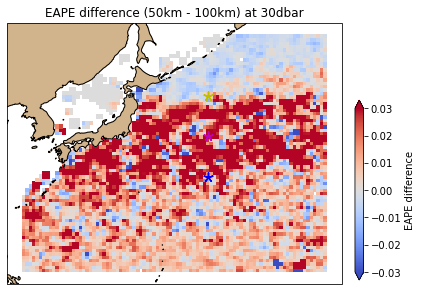

In [6]:
this_z = 3
tcmap = plt.get_cmap('coolwarm')
f, ax = plt.subplots(1,1,figsize=(6,5), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
ape_xr = xr.DataArray(data=np.transpose(df[0].eape1.data[:, :, this_z] - df[1].eape1.data[:, :, this_z]), \
                      dims=['latitude', 'longitude'], coords=data_coords)
ax.add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1)
ax.coastlines()
eape_diff = ape_xr.plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-0.03, vmax=0.03, cmap=tcmap, zorder=0, add_colorbar=False)
cbpos = [0.93, 0.15, 0.02, 0.5]
cax = f.add_axes(cbpos)
cb = f.colorbar(eape_diff, cax=cax, orientation='vertical', extend='both', label='EAPE difference')
ax.set_title('EAPE difference (50km - 100km) at ' + str(p_grid[this_z]) + 'dbar')
ax.scatter(Lon_grid[this_lat,this_lon],Lat_grid[this_lat,this_lon],color='m',marker=(5,2),s=80)
ax.scatter(Lon_grid[this_lat+12,this_lon],Lat_grid[this_lat+12,this_lon],color='y',marker=(5,2),s=80)
ax.scatter(Lon_grid[this_lat-12,this_lon],Lat_grid[this_lat-12,this_lon],color='b',marker=(5,2),s=80)

In [99]:
np.nanmax(zonal_avg_diff)

0.07778821159701949

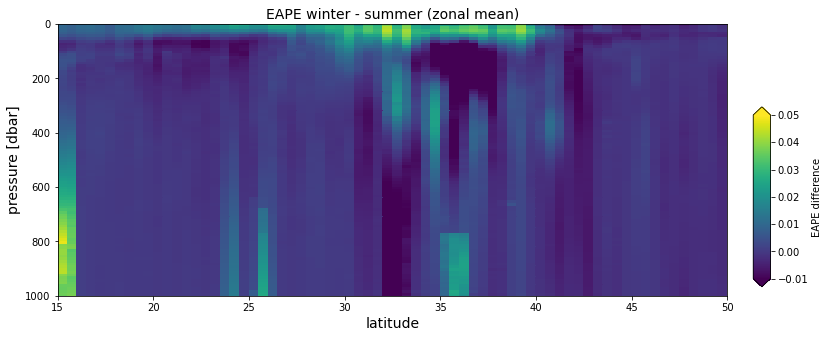

In [9]:
lon_in = np.where((lon_grid > 140) & (lon_grid < 160))[0]
zonal_avg_diff = np.nanmean(df[0].eape1.data[lon_in,:,:] - df[1].eape1.data[lon_in,:,:], axis=0)  # average across all longitudes 
f, ax = plt.subplots(1,1,figsize=(12,5))
eape_diff = ax.pcolor(lat_grid, p_grid, np.transpose(zonal_avg_diff), vmin=-0.01, vmax=0.05)
cbpos = [0.93, 0.15, 0.02, 0.5]
cax = f.add_axes(cbpos)
cb = f.colorbar(eape_diff, cax=cax, orientation='vertical', extend='both', label='EAPE difference')
ax.set_title('EAPE winter - summer (zonal mean)',fontsize=14)
ax.set_ylabel('pressure [dbar]',fontsize=14)
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylim([0,1000])
ax.invert_yaxis()
f.savefig('/Users/jakesteinberg/Documents/CPT/meetings/2021_06_09/ago_eape_seasonal_diff.jpg', dpi=550)

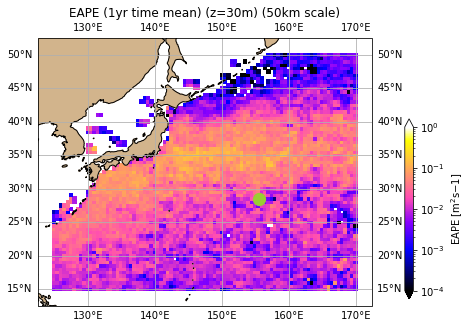

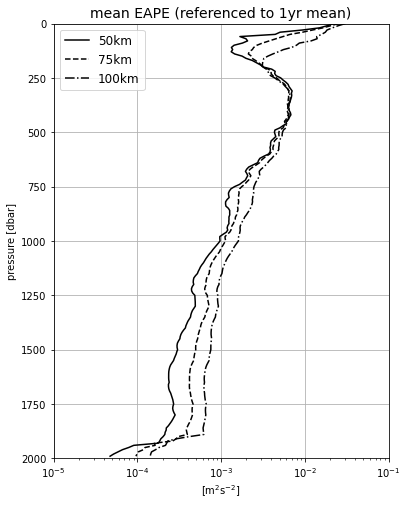

In [48]:
this_lon=np.where((lon_grid > 155) & (lon_grid < 156))[0]
this_lat=np.where((lat_grid > 28) & (lat_grid < 29))[0]

this_z = 3
ape_levs = [0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 10]
data_coords = {'latitude': lat_grid, 'longitude': lon_grid}
tcmap = plt.get_cmap('gnuplot2')
f, ax = plt.subplots(1,1,figsize=(6,5), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
ape_xr = xr.DataArray(data=np.transpose(df_1yr[0].eape1.data[:, :, this_z]), \
                      dims=['latitude', 'longitude'], coords=data_coords)
ax.add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1)
ax.coastlines()
eape = ape_xr.plot(ax=ax,transform=ccrs.PlateCarree(), norm=LogNorm(vmin=0.0001, vmax=1), cmap=tcmap, zorder=0, add_colorbar=False)
cbpos = [0.975, 0.15, 0.02, 0.5]
cax = f.add_axes(cbpos)
cb = f.colorbar(eape, cax=cax, orientation='vertical', extend='both', label='EAPE [m$^2$s${-1}$]')
ax.set_title('EAPE (1yr time mean) (z=' + str(p_grid[this_z]) + 'm) (50km scale)')
ax.scatter(Lon_grid[this_lat,this_lon],Lat_grid[this_lat,this_lon],color='#9ACD32',s=150)
ax.set_extent([lon_grid[0] - 2.5, lon_grid[-1] + 2.5, lat_grid[0] - 2.5, lat_grid[-1] + 2.5], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.xlabels_top = False
ax.ylabels_right = False
f.savefig('/Users/jakesteinberg/Documents/CPT/meetings/2021_07_01/argo_eape_map.jpg', dpi=550)

colors = ['m', 'y', 'b']
hres = ['50km', '75km', '100km']
# hres = ['winter', 'summer']
lst = ['-', '--', '-.']
f, ax = plt.subplots(1,1,figsize=(6,8))
for i in range(3):
    ax.plot(df_1yr[i].eape1.data[this_lon, this_lat][0,:], p_grid,color='k',linestyle=lst[i], label=hres[i])
    # ax.plot(df[i].eape1.data[this_lon, this_lat+15][0,:], p_grid,color=colors[1],linestyle=lst[i])
    # ax.plot(df[i].eape1.data[this_lon, this_lat-15][0,:], p_grid,color=colors[2],linestyle=lst[i])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=12) 
# ax.set_title('[' + str(lon_grid[this_lon]) + 'E, ' + str(lat_grid[this_lat]) + 'N]')
# ax.set_title('mean EAPE (referenced to 6 month mean)')
ax.set_title('mean EAPE (referenced to 1yr mean)',fontsize=14)
ax.set_xlabel('[m$^2$s$^{-2}$]')
ax.set_ylabel('pressure [dbar]')
ax.set_ylim([0, 2000])
ax.invert_yaxis()
ax.set_xlim([0.00001, 0.1])
ax.set_xscale('log')
ax.grid()
f.savefig('/Users/jakesteinberg/Documents/CPT/meetings/2021_07_01/argo_eape_3scales.jpg', dpi=550)

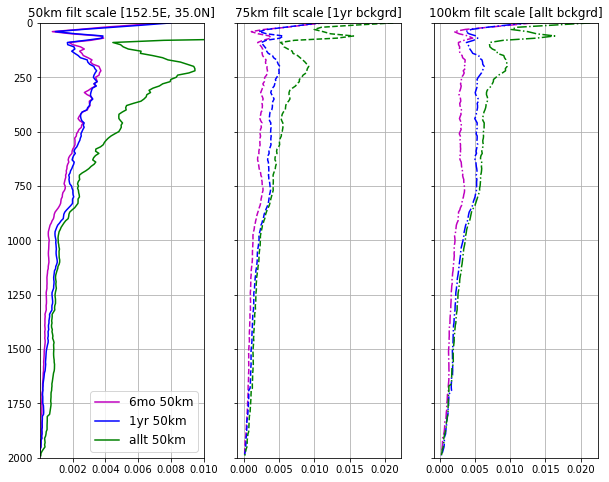

In [42]:
colors = ['m', 'm', 'm']
colors_2 = ['b', 'b', 'b']
colors_3 = ['g', 'g', 'g']
hres = ['6mo 50km', '6mo 75km', '6mo 100km']
hres_1yr = ['1yr 50km', '1yr 75km', '1yr 100km']
hres_allt = ['allt 50km', 'allt 75km', 'allt 100km']
lst = ['-', '--', '-.']
f, ax = plt.subplots(1,3,figsize=(10,8), sharey=True)
gax = ax.flatten()
for i in range(0,3):
    gax[i].plot(df[i].eape1.data[this_lat, this_lon],p_grid,color=colors[0],linestyle=lst[i], label=hres[i])
    # ax.plot(df[i].eape1.data[this_lat+12, this_lon],p_grid,color=colors[1],linestyle=lst[i], label=hres[i])
    # ax.plot(df[i].eape1.data[this_lat-12, this_lon],p_grid,color=colors[2],linestyle=lst[i], label=hres[i])

    gax[i].plot(df_1yr[i].eape1.data[this_lat, this_lon],p_grid,color=colors_2[0],linestyle=lst[i], label=hres_1yr[i])
    # ax.plot(df_1yr[i].eape1.data[this_lat+12, this_lon],p_grid,color=colors_2[1],linestyle=lst[i], label=hres_1yr[i])
    # ax.plot(df_1yr[i].eape1.data[this_lat-12, this_lon],p_grid,color=colors_2[2],linestyle=lst[i], label=hres_1yr[i])

    gax[i].plot(df_allt[i].eape1.data[this_lat, this_lon],p_grid,color=colors_3[0],linestyle=lst[i], label=hres_allt[i])
    # ax.plot(df_allt[i].eape1.data[this_lat+12, this_lon],p_grid,color=colors_3[1],linestyle=lst[i], label=hres_allt[i])
    # ax.plot(df_allt[i].eape1.data[this_lat-12, this_lon],p_grid,color=colors_3[2],linestyle=lst[i], label=hres_allt[i])
    gax[i].grid()
handles, labels = gax[0].get_legend_handles_labels()
gax[0].legend(handles, labels, fontsize=12,loc=4) 
gax[0].set_title('50km filt scale [' + str(lon_grid[this_lon]) + 'E, ' + str(lat_grid[this_lat]) + 'N]')
gax[1].set_title('75km filt scale [1yr bckgrd]')
gax[2].set_title('100km filt scale [allt bckgrd]')
gax[0].set_ylim([0, 2000])
gax[0].invert_yaxis()
gax[0].set_xlim([0.000001, 0.01])
# ax.set_xscale('log')
# f.savefig('/Users/jakesteinberg/Documents/CPT/meetings/2021_05_28/argo_eape_3sites_3timescales.jpg', dpi=550)

In [26]:
print(df_1yr[i].eape1.data[this_lat+12, this_lon][50:60])
print(df_allt[i].eape1.data[this_lat+12, this_lon][50:60])
p_grid[50]

[0.00124723 0.00128744 0.00130994 0.00134434 0.00138147 0.00141702
 0.00146036 0.00147878 0.0014833  0.00148088]
[0.00347963 0.00371281 0.00392473 0.00415554 0.00443037 0.00466358
 0.00489526 0.00511567 0.00530159 0.00549623]


500

[Text(1, 0, '15.0'),
 Text(1, 0, '20.0'),
 Text(1, 0, '25.0'),
 Text(1, 0, '30.0'),
 Text(1, 0, '35.0'),
 Text(1, 0, '40.0'),
 Text(1, 0, '45.0'),
 Text(1, 0, '50.0')]

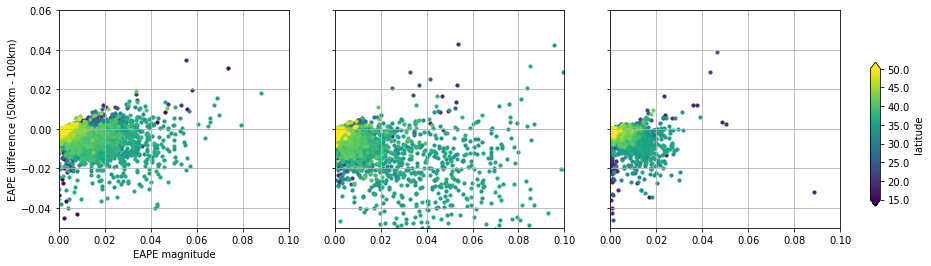

In [8]:
these_z = [5, 25, 75]
cc = plt.get_cmap('viridis',len(lat_grid))
# eape_mag = df[0].eape1.data[:, :, this_z]
# eape_diff = df[0].eape1.data[:, :, this_z] - df[2].eape1.data[:, :, this_z]
f, ax = plt.subplots(1,3,figsize=(14,4), sharex=True, sharey=True)
for zz in range(len(these_z)):
    eape_mag = df[0].eape1.data[:, :, these_z[zz]]
    eape_diff = df[0].eape1.data[:, :, these_z[zz]] - df[2].eape1.data[:, :, these_z[zz]]
    for i in range(len(lat_grid)):
        fd = ax[zz].scatter(eape_mag[:,i], eape_diff[:,i],color=cc(i),s=10)
ax[0].set_xlim([0, 0.1])
ax[0].set_ylim([-0.05, 0.06])
ax[0].set_xlabel('EAPE magnitude')
ax[0].set_ylabel('EAPE difference (50km - 100km)')
ax[0].grid()
ax[1].grid()
ax[2].grid()
cbpos = [0.93, 0.2, 0.01, 0.5]
cax = f.add_axes(cbpos)
cb = f.colorbar(fd, cax=cax, orientation='vertical', extend='both', label='latitude', ticks=np.linspace(0,1,8))
cb.ax.set_yticklabels(lat_grid[0::10])

In [67]:
jma_track = np.where((lon_grid > 136.5) & (lon_grid < 137.5))[0][0]
np.shape(df_allt[2].eape1)

(91, 71, 200)

In [234]:
# comparison to JMA ADCP 

adcp_lat_grid = np.arange(34.0625, 0, -0.125)
# adcp_lat_grid = np.flip(lat_grid[0:-30])

depth_grid = np.arange(25, 2000, 10)
data_file = glob.glob('/Users/jakesteinberg/Documents/CPT/shipboard/kuroshio/*.asc')
ascii_grid = np.loadtxt(data_file[-3], skiprows=3)
adcp_lat = ascii_grid[:,0]
depth = ascii_grid[:,1]
u = ascii_grid[:,2]/100.0
v = ascii_grid[:,3]/100.0
u_grid = np.nan * np.ones((len(data_file), len(depth_grid), len(adcp_lat_grid)))
v_grid = np.nan * np.ones((len(data_file), len(depth_grid), len(adcp_lat_grid)))
for m in tqdm(range(len(data_file))):
    ascii_grid = np.loadtxt(data_file[m], skiprows=3)
    lat = ascii_grid[:,0]
    depth = ascii_grid[:,1]
    u = ascii_grid[:,2]/100.0
    v = ascii_grid[:,3]/100.0
    for i in range(len(adcp_lat_grid)):
        prof_in = np.where(lat == adcp_lat_grid[i])[0]
        u_in = u[prof_in]
        v_in = v[prof_in]
        xy,x_ind,y_ind = np.intersect1d(depth_grid, depth[prof_in], return_indices=True)
        u_grid[m, x_ind, i] = u_in[y_ind]
        v_grid[m, x_ind, i] = v_in[y_ind]
u_mean = np.nanmean(u_grid, axis=0)
v_mean = np.nanmean(v_grid, axis=0)
ke = 0.5*(u_grid**2 + v_grid**2)
eke = np.nanmean(0.5*((u_grid-np.tile(u_mean, (len(data_file),1,1)))**2 + \
                      (v_grid-np.tile(v_mean, (len(data_file),1,1)))**2),axis=0)

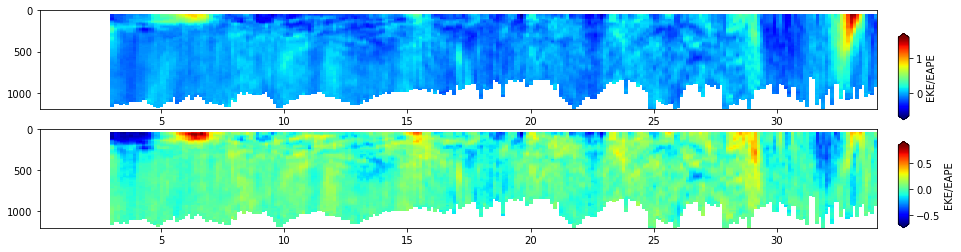

In [233]:
u_anom = u_grid-np.tile(u_mean, (len(data_file),1,1))
test = 12
f, (ax,ax2) = plt.subplots(2,1,figsize=(15,4))
fd = ax.pcolormesh(adcp_lat_grid, depth_grid, u_grid[test,:,:], cmap=plt.get_cmap('jet'), shading='flat')
ax.set_ylim([0,1200])
ax.invert_yaxis()
cbpos = [0.92, 0.5, 0.01, 0.3]
cax = f.add_axes(cbpos)
cb = f.colorbar(fd, cax=cax, orientation='vertical', extend='both', label='EKE/EAPE')
fd = ax2.pcolormesh(adcp_lat_grid, depth_grid, u_anom[test,:,:], cmap=plt.get_cmap('jet'), shading='flat')
ax2.set_ylim([0,1200])
ax2.invert_yaxis()
cbpos = [0.92, 0.125, 0.01, 0.3]
cax = f.add_axes(cbpos)
cb = f.colorbar(fd, cax=cax, orientation='vertical', extend='both', label='EKE/EAPE')

In [146]:
import gsw
eke_0 = np.fliplr(eke)
eke_2 = np.nan*np.ones((len(depth_grid), len(lat_grid)))
adcp_p_grid = gsw.p_from_z(-1*depth_grid, 30)
for i in range(len(depth_grid)):
    eke_2[i,:] = np.interp(lat_grid, np.flip(adcp_lat_grid), eke_0[i,:])
eke_3 = np.nan*np.ones((len(p_grid), len(lat_grid)))
for i in range(len(lat_grid)):
    eke_3[:,i] = np.interp(p_grid, adcp_p_grid, eke_2[:,i])

In [227]:
np.nanmax(eke)
np.nanmax(ke)

0.9644092731080647

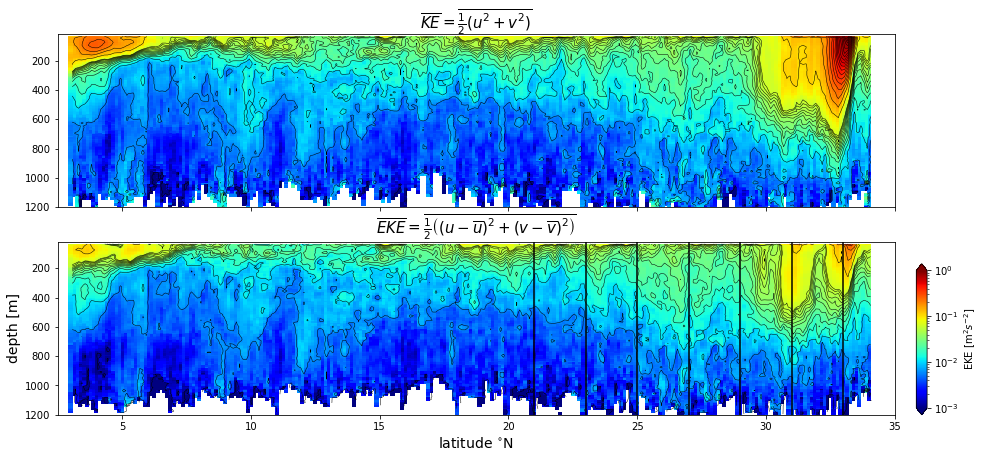

In [249]:
f, (ax0,ax) = plt.subplots(2,1,figsize=(15,7),sharex=True, sharey=True)
ax0.pcolormesh(adcp_lat_grid, depth_grid, np.nanmean(ke,axis=0), cmap=plt.get_cmap('jet'), \
          norm=LogNorm(vmin=0.001, vmax=1), shading='flat')
ax0.contour(adcp_lat_grid, depth_grid, np.nanmean(ke,axis=0), colors='k', linewidths=0.5, \
           levels=np.concatenate((np.arange(0.001, 0.06, 0.005), np.arange(0.06, 1, 0.05))))
ax0.set_title(r'$\overline{KE} = \overline{\frac{1}{2} \left( u^2 + v^2 \right)}$', \
            fontsize=15)

fd = ax.pcolormesh(adcp_lat_grid, depth_grid, eke, cmap=plt.get_cmap('jet'), \
          norm=LogNorm(vmin=0.001, vmax=1), shading='flat')
ax.contour(adcp_lat_grid, depth_grid, eke, colors='k', linewidths=0.5, \
           levels=np.concatenate((np.arange(0.001, 0.06, 0.005), np.arange(0.06, 1, 0.05))))
lat_i = np.arange(12,40,4)
for i in range(7):
    ax.plot([lat_grid[lat_i[i]], lat_grid[lat_i[i]]], [0, 1200], color='k')
ax.set_ylim([20,1200])
ax.set_xlim([2.5, 35])
cbpos = [0.92, 0.125, 0.01, 0.3]
cax = f.add_axes(cbpos)
cb = f.colorbar(fd, cax=cax, orientation='vertical', extend='both', label='EKE [m$^2$$s^{-2}$]')
ax.set_ylabel('depth [m]', fontsize=14)
ax.set_xlabel('latitude $^{\circ}$N', fontsize=14)
ax.set_title(r'$\overline{EKE} = \overline{\frac{1}{2} \left( (u - \overline{u})^2 + (v - \overline{v})^2 \right)}$', \
            fontsize=15)
ax.invert_yaxis()
f.savefig('/Users/jakesteinberg/Documents/CPT/meetings/2021_05_28/argo_jma_ke_eke.jpg', dpi=550)

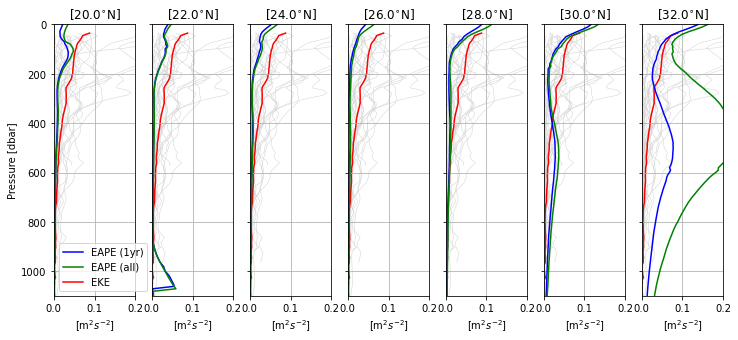

In [254]:
lat_i = np.arange(10,40,4)
m = 2
f, ax = plt.subplots(1,7,figsize=(12,5),sharey=True)
gax = ax.flatten()
for i in range(len(gax)):
    gax[i].plot(df_1yr[m].eape1.data[jma_track][lat_i[i],:], p_grid,label='EAPE (1yr)',color='b')
    gax[i].plot(df_allt[m].eape1.data[jma_track][lat_i[i],:], p_grid,label='EAPE (all)',color='g')
    adcp_ref = np.where(adcp_lat_grid > lat_grid[lat_i[i]])[0]
    gax[i].plot(eke[:,adcp_ref[0]], adcp_p_grid,zorder=1,label='EKE',color='r')
    for j in range(np.shape(ke)[0]):
        gax[i].plot(ke[j, :,adcp_ref[0]], adcp_p_grid, color='#D3D3D3', linewidth=0.5,zorder=0)
    gax[i].set_title('[' + str(lat_grid[lat_i[i]]) + '$^{\circ}$N]')
    gax[i].set_xlim([0, 0.2])
    gax[i].set_xlabel('[m$^2$$s^{-2}$]')
    gax[i].grid()
handles, labels = gax[0].get_legend_handles_labels()
gax[0].legend(handles, labels, fontsize=10) 
gax[0].set_ylabel('Pressure [dbar]')
gax[0].set_ylim([0,1100])
gax[0].invert_yaxis()
f.savefig('/Users/jakesteinberg/Documents/CPT/meetings/2021_05_28/argo_jma_ke_eke_profiles.jpg', dpi=550)

Text(0.5, 1.0, 'EKE / EAPE')

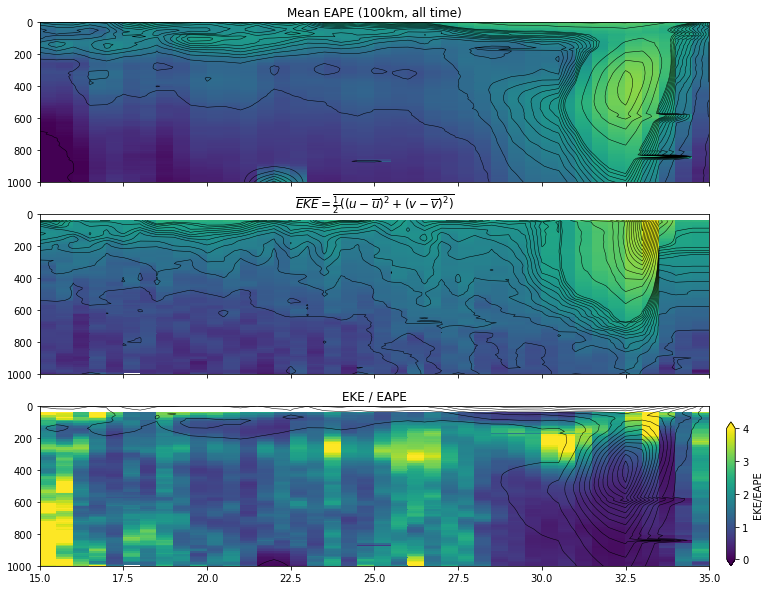

In [170]:
jma_track = np.where((lon_grid > 136.5) & (lon_grid < 137.5))[0][0]
i = 2  # 50,75,100
f, (ax,ax2,ax3) = plt.subplots(3,1,figsize=(12,10),sharey=True,sharex=True)
ax.pcolormesh(lat_grid, p_grid, np.transpose(df_allt[i].eape1.data[jma_track]), \
          norm=LogNorm(vmin=0.001, vmax=1), shading='flat')
ax.contour(lat_grid, p_grid, np.transpose(df_allt[i].eape1.data[jma_track]), colors='k', linewidths=0.5, \
           levels=np.concatenate((np.arange(0.001, 0.06, 0.005), np.arange(0.06, 1, 0.05))))
ax2.pcolormesh(lat_grid, p_grid, eke_3, \
          norm=LogNorm(vmin=0.001, vmax=1), shading='flat')
ax2.contour(lat_grid, p_grid, eke_3, colors='k', linewidths=0.5, \
           levels=np.concatenate((np.arange(0.001, 0.06, 0.005), np.arange(0.06, 1, 0.05))))
fd = ax3.pcolormesh(lat_grid, p_grid, eke_3/np.transpose(df_allt[i].eape1.data[jma_track]), \
          vmin=0, vmax=4, shading='flat')
ax3.contour(lat_grid, p_grid, np.transpose(df_allt[i].eape1.data[jma_track]), \
           colors='k', linewidths=0.5, levels=np.arange(0,1,0.02))
cbpos = [0.92, 0.125, 0.01, 0.2]
cax = f.add_axes(cbpos)
cb = f.colorbar(fd, cax=cax, orientation='vertical', extend='both', label='EKE/EAPE')
ax3.set_xlim([15, 35])
ax3.set_ylim([0,1000])
ax3.invert_yaxis()
ax.set_title('Mean EAPE (100km, all time)')
ax2.set_title(r'$\overline{EKE} = \overline{\frac{1}{2} \left( (u - \overline{u})^2 + (v - \overline{v})^2 \right)}$')
ax3.set_title('EKE / EAPE')

In [10]:
# MLD test 
f_argo_mld = '/Users/jakesteinberg/Documents/CPT/Argo/Argo_mixedlayers_monthlyclim_12112019.nc'
argo_mld = xr.open_dataset(f_argo_mld)

In [11]:
argo_mld

<xarray.Dataset>
Dimensions:        (iLAT: 180, iLON: 360, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables:
    lat            (iLAT) float64 ...
    lon            (iLON) float64 ...
    month          (iMONTH) float64 ...
    mld_da_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_da_median  (iLAT, iLON, iMONTH) float64 ...
    mld_dt_median  (iLAT, iLON, iMONTH) float64 ...
    mld_da_std     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_std     (iLAT, iLON, iMONTH) float64 ...
    mld_da_max     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_max     (iLAT, iLON, iMONTH) float64 ...
    mlpd_da        (iLAT, iLON, iMONTH) float64 ...
    mlpd_dt        (iLAT, iLON, iMONTH) float64 ...
    mlt_da         (iLAT, iLON, iMONTH) float64 ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 ...
    mls_da         (iLAT, iLON, iMONTH) float64 ...
    mls_dt         (iLAT, iLON, iMONTH) float64 ...
    num            (iLAT, iLON, iMONTH) float64 ...
    longrid        (iLAT, iLON) float64 ...
    latgrid        (iLAT, iLON) float64 ...
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         [730848.53015047 730848.88790506 730849.28543982 ... 737759...

In [85]:
mld_lon = argo_mld['lon'].data
mld_lat = argo_mld['lat'].data
mld_mo = argo_mld['month'].data
mld = argo_mld['mld_da_mean'].data
mld_t = argo_mld['mlt_dt'].data
mld_s = argo_mld['mls_dt'].data

In [86]:
max_mo = np.nan * np.ones((np.shape(mld)[0], np.shape(mld)[1]))
min_mo = np.nan * np.ones((np.shape(mld)[0], np.shape(mld)[1]))
min_den = np.nan * np.ones((np.shape(mld)[0], np.shape(mld)[1]))
max_den = np.nan * np.ones((np.shape(mld)[0], np.shape(mld)[1]))
for i in range(np.shape(mld)[0]):
    for j in range(np.shape(mld)[1]):
        if np.sum(np.isnan(mld[i,j,:])) < 11:
            max_mo[i,j] = mld[i,j,np.where(mld[i,j,:] == np.nanmax(mld[i,j,:]))[0]]
            min_mo[i,j] = mld[i,j,np.where(mld[i,j,:] == np.nanmin(mld[i,j,:]))[0]]
            this_den = gsw.sigma0(mld_s[i,j,:], mld_t[i,j,:])
            min_den[i,j] = np.nanmin(this_den)
            max_den[i,j] = np.nanmax(this_den)

In [87]:
from altimetry_tools import Filter

mld_energy = min_mo*(max_den-min_den) + 0.5*(max_mo-min_mo)*(max_den-min_den)
# mld_energy = (max_den-min_den)/(max_mo-min_mo)

mld_energy_smooth = np.nan * np.ones(np.shape(mld_energy))
for i in range(np.shape(mld)[0]):
    ff1 = Filter('Gaussian', [mld_energy[i,:][None,:]], 1, 5, plot_filter=0) 
    mld_energy_smooth[i,:] = ff1[0]
for j in range(np.shape(mld)[1]):
    ff1 = Filter('Gaussian', [mld_energy_smooth[:,j][None,:]], 1, 5, plot_filter=0) 
    mld_energy_smooth[:,j] = ff1[0]

Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>

Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>

Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>

Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>

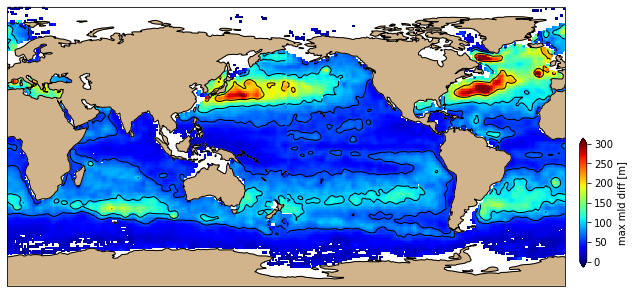

In [88]:
# mld_energy = min_mo*(max_den-min_den) + 0.5*(max_mo-min_mo)*(max_den-min_den)
# mld_change = max_mo-min_mo
data_coords = {'latitude': mld_lat, 'longitude': mld_lon}
arg_mld = xr.DataArray(data=mld_energy_smooth, dims=['latitude', 'longitude'], coords=data_coords)
tcmap_2 = plt.get_cmap('jet')

f, ax = plt.subplots(1,1,figsize=(10,6), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
mld_p = arg_mld.plot(ax=ax,transform=ccrs.PlateCarree(), \
                     vmin=0, vmax=300, \
                     cmap=tcmap_2, zorder=0, add_colorbar=False)
ax.contour(mld_lon,mld_lat,mld_energy_smooth,levels=[60, 100,200], \
            colors='k',linewidths=1,zorder=2,transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1)
ax.coastlines()
cbpos = [0.92, 0.222, 0.01, 0.3]
cax = f.add_axes(cbpos)
cb = f.colorbar(mld_p, cax=cax, orientation='vertical', extend='both', label='max mld diff [m]')